# Proyecto 1, Modelos de Gestión Financiera
## Sebastian Puerto
## 25 de septiembre de 2019

# Punto 2

In [1]:
from simulador_S import grafico_valor_activo

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
def d1(S, t, E, r, sig, T):
    res = np.log(E/S) - (r + sig**2/2)*(T-t)
    res = res/( sig * np.sqrt(T-t) )
    
    return res

def d2(S, t, E, r, sig, T):
    res = np.log(E/S) - (r - sig**2/2)*(T-t)
    res = res/( sig * np.sqrt(T-t) )
    
    return res

def callV(S, t, E1, E2, r, sig, T):
    
    d1E1 = d1(S, T, E1, r, sig, T)
    d1E2 = d1(S, T, E2, r, sig, T)
    d2E1 = d2(S, T, E1, r, sig, T)
    d2E2 = d2(S, T, E2, r, sig, T)
    
    p1 = norm.cdf(d1E2) - norm.cdf(d1E1)
    
    p2 = norm.cdf(d2E2)- norm.cdf(d2E1)
    return S * p1  -  E1*np.exp(-r*(T-t)) * p2

# Calculo de Rentabilidades de Portafolios

In [3]:
def matriz_de(x, y, z):
    return  np.array([[x], [y], [z]])

## Calculo de Portafolios Optimos

In [4]:
def calcularPortOpt(precios):#print("Precios: \n", precios)
    M, N = np.shape(precios)
    N -= 1

    retornos = np.zeros((M, N))
    for k in range(M):
        for i in range(N):
            retornos[k, i] = np.log(precios[k, i+1]/precios[k, i])#(precios[k, i+1]-precios[k, i])/precios[k, i] #np.log(precios[k, i+1]/precios[k, i])
    #print(np.shape(retornos))
    #print("retornos \n", retornos)

    # Hallar el promedio de la matriz de retornos a lo largo del eje temporal
    retProm = np.mean(retornos, 1, keepdims = True) 
    #print("Rendimientos Prom", retProm)

    # Hallar matriz de covarianza
    S = np.zeros((M,M)) # Inicializacion en 0's

    for k in range(M): # Iterar con k sobre activos
        for l in range(M): # Iterar con l sobre activos
            for i in range(N): # Iterar sobre el tiempo con i
                # Para la combinacion de activos k y l se suma la contribución a la covarianza por el tiempo i
                S[k, l] += (retornos[k, i] - retProm[k])*(retornos[l, i] - retProm[l])

    S = S/N
    #print("Matriz de covarianzas:\n", S)
    varianzas = np.array([S[i, i] for i in range(M)]).reshape((M, 1))
    desvs = np.sqrt(varianzas)

    #print("\nVarianzas:\n", varianzas)


    def varPort(x): # Funcion de calculo de varianza de un portafolio x^T S x
        return x.T.dot(S).dot(x)[0,0]

    # Parametros de la teoria
    Sinv = np.linalg.inv(S)
    u = np.ones((M, 1))

    A = u.T.dot(Sinv.dot(u))[0,0]
    B = u.T.dot(Sinv.dot(retProm))[0,0]
    C = retProm.T.dot(Sinv.dot(retProm))[0,0]
    D = A*C - B**2

    muopt = B/A
    varopt = 1/A

    def xOptMu(mu): # Funcion para calculo del portafolio optimo dado parametro mu. Devuelve matrix mx1
        return ((C - B*mu)/D) * Sinv.dot(u) + ((A*mu - B)/D) * Sinv.dot(retProm)
    
    xopt = xOptMu(muopt)
    return xopt, np.sqrt(varPort(xopt))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Mejor port de 3 (S, C, valor pres):
 [[-2.69202227e-05]
 [ 1.10827645e-05]
 [ 1.00001584e+00]]
Mejor port de 2 (S, valor pres):
 [[-3.97189450e-06]
 [ 1.00000398e+00]]
Sigma calculada para el portafolio S y tasa libre de riesgo: 6.681438073072926e-06
Sigma calculada para el portafolio S, opcion, t tasa libre de riesgo: 6.673385386249459e-06
Sigma calculada para el portafolio S y tasa libre de riesgo: 4.010604013873567e-06
Sigma calculada para el portafolio S, opcion, t tasa libre de riesgo: 4.00968780529254e-06


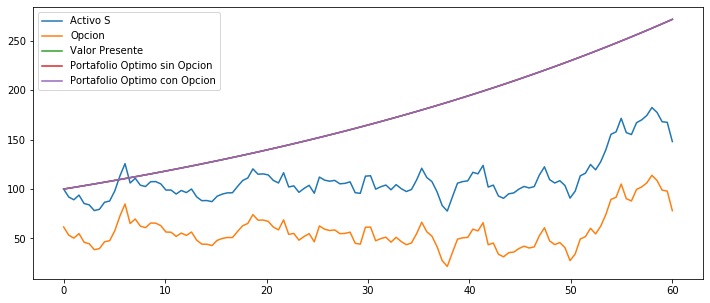

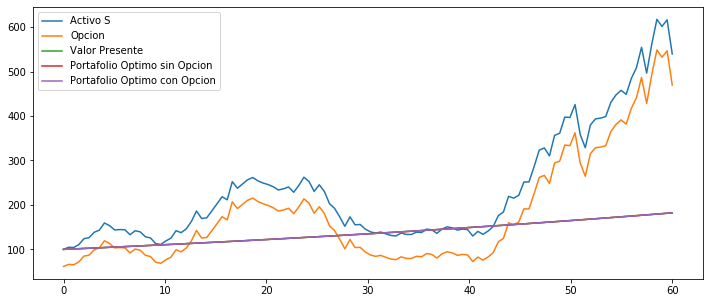

In [5]:
mmu = 0.02
ssig = 0.1

## Simulacion 1
ts, Ss = grafico_valor_activo(mu = mmu, sig = ssig, S0 = 100, N = 60, txtad = "Sim. 1", graficar = False, pts = 120)
#ts, S2s = grafico_valor_activo(mu = mmu, sig = ssig, S0 = 100, N = 60, txtad = "Sim. 2", graficar = False)

Cs = callV(S = Ss, t = ts, E1 = 70, E2 = 60000, r = mmu/2, sig = ssig, T = 60) # r = mu / 1.2
Ls = 100.*np.exp(mmu*ts/1.2)

precios = np.array([Ss, Cs, Ls])
portMej3, sig3 = calcularPortOpt(precios)
print("Mejor port de 3 (S, C, valor pres):\n", portMej3)

precios = np.array([Ss, Ls])
portMej2, sig2 = calcularPortOpt(precios)
print("Mejor port de 2 (S, valor pres):\n", portMej2)

musMej2 = portMej2[0,0]*Ss + portMej2[1,0]*Ls
musMej3 = portMej3[0,0]*Ss + portMej3[1,0]*Cs + portMej3[2,0]*Ls


fig = plt.figure(figsize=(12, 5))
plt.plot(ts, Ss)
plt.plot(ts, Cs)
plt.plot(ts, Ls)
plt.plot(ts, musMej2)
plt.plot(ts, musMej3)

plt.legend(("Activo S", "Opcion", "Valor Presente", 
            "Portafolio Optimo sin Opcion", "Portafolio Optimo con Opcion"), loc = "upper left")

print("Sigma calculada para el portafolio S y tasa libre de riesgo:", sig2)
print("Sigma calculada para el portafolio S, opcion, t tasa libre de riesgo:", sig3)

## Simulacion 2
ts, Ss = grafico_valor_activo(mu = mmu, sig = ssig, S0 = 100, N = 60, txtad = "Sim. 1", graficar = False, pts = 120)
#ts, S2s = grafico_valor_activo(mu = mmu, sig = ssig, S0 = 100, N = 60, txtad = "Sim. 2", graficar = False)

Cs = callV(S = Ss, t = ts, E1 = 70, E2 = 6000, r = mmu/2, sig = ssig, T = 60) # r = mu / 2
Ls = 100.*np.exp(mmu*ts/2)

precios = np.array([Ss, Cs, Ls])
portMej3, sig3 = calcularPortOpt(precios)
#print("Mejor port de 3 (S, C, valor pres):\n", portMej3)

precios = np.array([Ss, Ls])
portMej2, sig2 = calcularPortOpt(precios)
#print("Mejor port de 2 (S, valor pres):\n", portMej2)

musMej2 = portMej2[0,0]*Ss + portMej2[1,0]*Ls
musMej3 = portMej3[0,0]*Ss + portMej3[1,0]*Cs + portMej3[2,0]*Ls


fig = plt.figure(figsize=(12, 5))
plt.plot(ts, Ss)
plt.plot(ts, Cs)
plt.plot(ts, Ls)
plt.plot(ts, musMej2)
plt.plot(ts, musMej3)

plt.legend(("Activo S", "Opcion", "Valor Presente", 
            "Portafolio Optimo sin Opcion", "Portafolio Optimo con Opcion"), loc = "upper left")

print("Sigma calculada para el portafolio S y tasa libre de riesgo:", sig2)
print("Sigma calculada para el portafolio S, opcion, t tasa libre de riesgo:", sig3)

In [37]:
mus  = np.array([0.001, 0.005, 0.015, 0.03])
#mus = [0.02]
sigs = [0.01, 0.05, 0.09, 0.15]
#sigs = [0.1]

ultimosS = np.array([])
ultimosMus = np.array([])
ratios = np.array([])
#rendsMej2 = []
#coeficiente = []

for i in range(100):
    for mmu in mus:
        for ssig in sigs:
            ts, Ss = grafico_valor_activo(mu = mmu, sig = ssig, S0 = 100, N = 60, txtad = "Sim. 1", graficar = False, pts = 60)

            Cs = callV(S = Ss, t = ts, E1 = 70, E2 = 600, r = mmu/2, sig = ssig, T = 60) # r = mu / 2
            Ls = 100.*np.exp(mmu*ts/2)

            precios = np.array([Ss, Cs, Ls])
            portMej3, sig3 = calcularPortOpt(precios)
            musMej3 = portMej3[0,0]*Ss + portMej3[1,0]*Cs + portMej3[2,0]*Ls
            
            ultimosMus = np.append(ultimosMus, musMej3[-1])
            ultimosS = np.append(ultimosS, Ss[-1])
            ratios = np.append(ratios, ultimosMus[-1]/ultimosS[-1])
    
        
#rendsMej3 = np.array(rendsMej3)
#ultimosS = np.array(ultimosS)

#ratio = rendsMej3/ultimosS

mayores = 0
totales = 0
for r in ratios:
    if r > 1:
        mayores += 1
        totales += 1
    if r < 1:
        totales += 1
print(mayores, totales)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in subtract


181 928


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: i

AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'

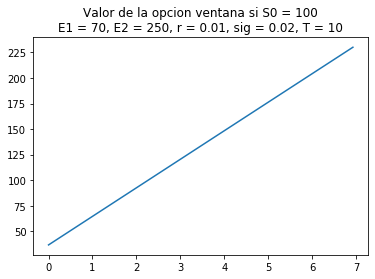

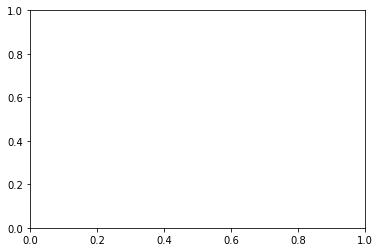

In [7]:
callV(S = 100, t = 20, E1 = 80, E2 = 200, r = 0.015, sig = 0.09, T = 100)

ts = np.linspace(0, 7, 100)
Ss = np.linspace(100, 300, 100)
#cs = callV(S = Ss, t = ts, E1 = 70, E2 = 250, r = 0.01, sig = 0.02, T = 10) # Funciona chevere
cs = callV(S = Ss, t = ts, E1 = 70, E2 = 300, r = 0.01, sig = 0.02, T = 10)

plt.figure()
plt.title("Valor de la opcion ventana si S0 = 100\nE1 = 70, E2 = 250, r = 0.01, sig = 0.02, T = 10")
plt.plot(ts, cs)

fig = plt.figure()
ts = np.linspace(0, 24, 200)
Ss = np.linspace(0, 300, 200)
Ts, Ss = np.meshgrid(ts, Ss)
Cs = callV(S = Ss, t = Ts, E1 = 80, E2 = 200, r = 0.015, sig = 0.09, T = 100)
#print(Cs)

ax = fig.gca()
ax.plot_surface(Ss, Ts, Cs)
plt.show()
